In [15]:
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
from pycountry import countries
import numpy as np
from plotly.subplots import make_subplots

In [16]:
emissions = pd.read_csv('Datasets/emissions.csv')
traffic = pd.read_csv('Datasets/traffic.csv')
gdp = pd.read_csv('Datasets/GDP.csv')

Check Brussels Airport

In [17]:
traffic_BX = traffic[
    (traffic['rep_airp'] == 'BE_EBBR') &
    (traffic['unit'] == 'NR')                   
]

emissions_BX = emissions[
    (emissions['geo'] == 'BE_CAP') &
    (emissions['TIME_PERIOD'] >= '2019-01')
]

In [18]:
# Create figure
fig = go.Figure()

# Add traces for traffic
fig.add_trace(go.Scatter(
    x=traffic_BX['TIME_PERIOD'],
    y=traffic_BX['OBS_VALUE'],
    name="Traffic change [%]",
    line=dict(color='blue'),
))

# Add traces for emissions
fig.add_trace(go.Scatter(
    x=emissions_BX['TIME_PERIOD'],
    y=emissions_BX['OBS_VALUE'],
    name="Emissions (NO_2)",
    line=dict(color='green'),
    yaxis="y2"
))

# Update layout for dual-axis
fig.update_layout(
    title='Traffic and Emissions Over Time in Brussels ',
    xaxis=dict(title='TIME_PERIOD'),
    yaxis=dict(title='Traffic OBS_VALUE'),
    yaxis2=dict(
        title='Emissions OBS_VALUE',
        overlaying='y',
        side='right'
    )
)

# Show the figure
fig.show()

Traffic Schiphol Airport and Nitrogen dioxide emission in Amsterdam 

In [19]:
traffic_Schiphol_number = traffic[
    (traffic['rep_airp'] == 'NL_EHAM') &
    (traffic['unit'] == 'NR') &
    (traffic['TIME_PERIOD'] >= '2019-02')                   
]

traffic_Schiphol_percentage = traffic[
    (traffic['rep_airp'] == 'NL_EHAM') &
    (traffic['unit'] == 'PCH_M1')                   
]

emissions_Amsterdam = emissions[
    (emissions['geo'] == 'NL_CAP') &
    (emissions['TIME_PERIOD'] >= '2019-02')
]

In [20]:
# Create figure
fig = go.Figure()

# Add traces for traffic
fig.add_trace(go.Scatter(
    x=traffic_Schiphol_number['TIME_PERIOD'],
    y=traffic_Schiphol_number['OBS_VALUE'],
    name="Traffic [Number]",
    line=dict(color='blue'),
))

# Add traces for emissions
fig.add_trace(go.Scatter(
    x=emissions_Amsterdam['TIME_PERIOD'],
    y=emissions_Amsterdam['OBS_VALUE'],
    name="Emissions (NO_2)",
    line=dict(color='green'),
    yaxis="y2"
))

# Add a third trace for traffic change in percentage
fig.add_trace(go.Scatter(
    x=traffic_Schiphol_percentage['TIME_PERIOD'],
    y=traffic_Schiphol_percentage['OBS_VALUE'],
    name="Traffic Change [%]",
    line=dict(color='blue', dash = 'dash' ),
    yaxis="y3"  # Designating the third y-axis for this trace
))

# Update layout for tri-axis
fig.update_layout(
    title='Traffic, Emissions, and Traffic Change Over Time in Amsterdam',
    xaxis=dict(title='TIME_PERIOD'),
    yaxis=dict(title='Traffic [Number]'),
    yaxis2=dict(
        title='Emissions (NO_2)',
        overlaying='y',
        side='right'
    ),
    yaxis3=dict(
        title='Traffic Change [%]',
        overlaying='y',
        side='left',  # You may want to set this to 'right' if overlay becomes a concern
        anchor="free",
        position=0.05  # The position is a fraction of the plot width
    )
)

fig.add_hline(y=24000, line_color = 'red', line_dash = 'dot')
# Show the figure
fig.show()

In [21]:
# gdp = gdp[gdp['geo'] == 'EL'].drop(axis = 1)

def alpha2_to_alpha3(alpha_2):
    return str(countries.get(alpha_2=alpha_2).alpha_3)

gdp['geo_3'] = np.NaN
for i in range(len(gdp)):
    gdp['geo_3'][i] = alpha2_to_alpha3(gdp['geo'][i])

/var/folders/t7/zv66s7112kz90jccz5_hq3480000gn/T/ipykernel_26431/1050671504.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
list_countries = gdp['geo'].unique()
icao_codes = ['LOWW', 'EBBR', 'LBSF', 'LSZH', 'LCLK', 'LKPR', 'EDDF', 'EKCH', 'EETN', 'LEMD', 'EFHK', 'LFPG', 'LDZA', 'LHBP', 'EIDW', 'BIKF', 'LIRF', 'EYVI', 'ELLX', 'EVRA', 'LMML', 'EHAM', 'ENGM', 'EPWA', 'LPPT', 'LROP', 'ESSA', 'LJLJ', 'LZIB']

In [23]:
emissions_cleaned = emissions
emissions_cleaned['geo_2'] = np.nan
emissions_cleaned['geo_3'] = np.nan
for i in range(len(emissions_cleaned)):
    split_geo = emissions_cleaned['geo'][i].split('_')[0]
    emissions_cleaned['geo_2'][i] = split_geo

emissions_cleaned = emissions_cleaned[emissions_cleaned['geo_2'].isin(list_countries)]

geo3_list = []
for i in emissions_cleaned['geo_2']:
    geo3 = alpha2_to_alpha3(i)
    geo3_list.append(geo3)
emissions_cleaned['geo_3'] = geo3_list

/var/folders/t7/zv66s7112kz90jccz5_hq3480000gn/T/ipykernel_26431/3748212460.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t7/zv66s7112kz90jccz5_hq3480000gn/T/ipykernel_26431/3748212460.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
emissions_cleaned[['year', 'month']] = emissions_cleaned['TIME_PERIOD'].str.split('-', expand = True)
emissions_cleaned['OBS_VALUE'] = emissions_cleaned['OBS_VALUE'].round(0).astype(int)

emissions_map = emissions_cleaned.groupby(by = ['geo_3', 'year']).sum()
emissions_map = emissions_map.reset_index()

/var/folders/t7/zv66s7112kz90jccz5_hq3480000gn/T/ipykernel_26431/281104142.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t7/zv66s7112kz90jccz5_hq3480000gn/T/ipykernel_26431/281104142.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t7/zv66s7112kz90jccz5_hq3480000gn/T/ipykernel_26431/281104142.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [25]:
fig1 = px.choropleth(gdp, 
                    locations="geo_3", 
                    color="OBS_VALUE",
                    hover_name="geo",
                    animation_frame="TIME_PERIOD",
                    scope="europe",
                    color_continuous_scale=px.colors.sequential.Reds,
                    projection="natural earth",
                    locationmode='ISO-3', 
                    height=1000)

fig1.update_layout(transition_duration=500,
                  title_text='GDP of European Countries from 2019 to 2022')

fig1.show()


In [26]:
fig2 = px.scatter_geo(emissions_map, 
                    locations="geo_3", 
                    hover_name="geo_3",
                    animation_frame="year",
                    scope="europe",
                    color_continuous_scale=px.colors.sequential.PuBu,
                    projection="natural earth",
                    locationmode='ISO-3',
                    size = "OBS_VALUE", 
                    size_max= 60,
                    text="OBS_VALUE", 
                    height=1000)

fig2.update_layout(transition_duration=500,
                  title_text='Nitrogen Dioxide Emission of European Countries from 2019 to 2022')

fig2.show()

In [27]:
#Combining fig1 and fig2 
combined_fig = fig1['data'] + fig2['data']

combined_animation = []

for c_frame, s_frame in zip(fig1.frames, fig2.frames):
    combined_data = c_frame['data'] + s_frame['data']
    combined_animation.append(go.Frame(data=combined_data, name=c_frame['name']))


fig_GDP_emission = go.Figure(data = combined_fig, layout = fig1['layout'], frames= combined_animation)

fig_GDP_emission.update_layout(title = 'Nitrogen Dioxide emissions in terms of GDP of European Countries from 2019 to 2022')

fig_GDP_emission.show()

In [28]:
traffic[['geo_2', 'ICAO']] = traffic['rep_airp'].str.split('_', expand = True)
traffic[['year', 'month']] = traffic['TIME_PERIOD'].str.split('-', expand=True)

traffic_cleaned = traffic[traffic['geo_2'].isin(list_countries)]
traffic_cleaned = traffic_cleaned[traffic_cleaned['ICAO'].isin(icao_codes)]


traffic_cleaned['geo_3'] = np.NaN
geo3_list = []
for i in traffic_cleaned['geo_2']:
    geo3 = alpha2_to_alpha3(i)
    geo3_list.append(geo3)
traffic_cleaned['geo_3'] = geo3_list

traffic_map = traffic_cleaned[traffic_cleaned['unit'] == 'NR']
traffic_map = traffic_map[traffic['year'] < '2023']
traffic_map =  traffic_map.groupby(by = ['geo_3', 'year']).sum()

traffic_map = traffic_map.reset_index()

/var/folders/t7/zv66s7112kz90jccz5_hq3480000gn/T/ipykernel_26431/882240433.py:16: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/t7/zv66s7112kz90jccz5_hq3480000gn/T/ipykernel_26431/882240433.py:17: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [29]:
fig3 = px.choropleth(traffic_map, 
                    locations="geo_3", 
                    color="OBS_VALUE",
                    hover_name="geo_3",
                    animation_frame="year",
                    scope="europe",
                    color_continuous_scale=px.colors.sequential.Reds,
                    projection="natural earth",
                    locationmode='ISO-3', 
                    height=1000)

fig3.update_layout(transition_duration=500,
                  title_text='Commercial aviation Traffic of European Countries from 2019 to 2023')

fig3.show()

Aanpassen naar alleen de vliegvelden van te grote steden want dioxide data alleen van de steden

In [30]:
#Combining fig1 and fig2 
combined_fig = fig3['data'] + fig2['data']

combined_animation = []

for c_frame, s_frame in zip(fig3.frames, fig2.frames):
    combined_data = c_frame['data'] + s_frame['data']
    combined_animation.append(go.Frame(data=combined_data, name=c_frame['name']))


fig_Traffic_emission = go.Figure(data = combined_fig, layout = fig3['layout'], frames= combined_animation)

fig_Traffic_emission.update_layout(title = 'Nitrogen Dioxide emissions in terms of Commercial Aviation Traffic of European Countries from 2019 to 2022')

fig_Traffic_emission.show()

## Correlation heatmap between gdp, emissions and traffic

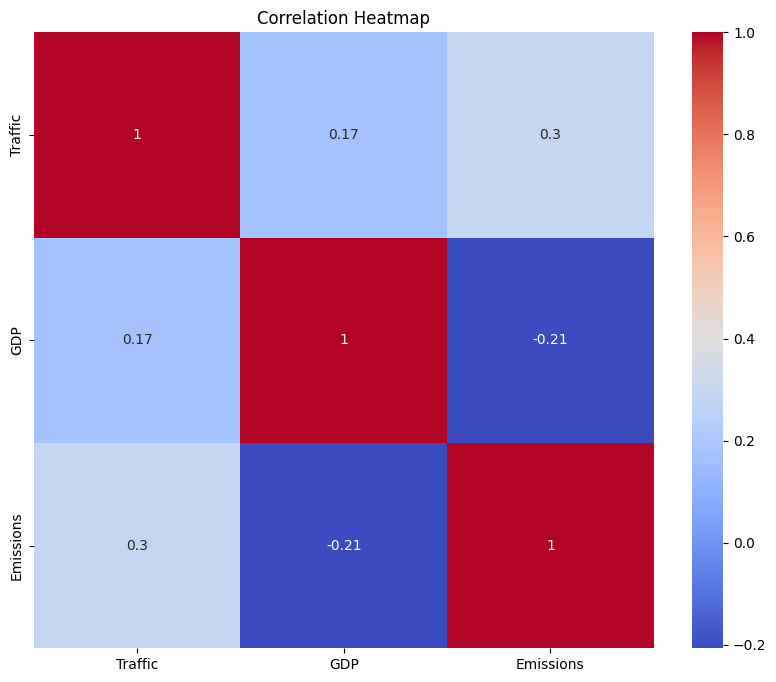

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gdp['TIME_PERIOD'] = gdp['TIME_PERIOD'].astype(str)
gdp['year'] = gdp['TIME_PERIOD'].str.split('-').str[0]

merged_df = pd.merge(gdp, emissions_map, on=['geo_3', 'year'], how='inner', suffixes=('', '_emissions'))
merged_df = pd.merge(merged_df, traffic_map, on=['geo_3', 'year'], how='inner', suffixes=('', '_traffic'))

selected_cols = ['OBS_VALUE_traffic', 'OBS_VALUE', 'OBS_VALUE_emissions']
correlation_matrix = merged_df[selected_cols].corr()

correlation_matrix = correlation_matrix.rename(columns={
    'OBS_VALUE_traffic': 'Traffic',
    'OBS_VALUE': 'GDP',
    'OBS_VALUE_emissions': 'Emissions'
}, index={
    'OBS_VALUE_traffic': 'Traffic', 
    'OBS_VALUE': 'GDP',
    'OBS_VALUE_emissions': 'Emissions'})

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
print("gdp columns:", gdp.columns)
print("emissions_map columns:", emissions_map.columns)
print("traffic_map columns:", traffic_map.columns)


gdp columns: Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'na_item', 'ppp_cat', 'geo',
       'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG', 'geo_3'],
      dtype='object')
emissions_map columns: Index(['geo_3', 'year', 'OBS_VALUE', 'OBS_FLAG'], dtype='object')
traffic_map columns: Index(['geo_3', 'year', 'OBS_VALUE'], dtype='object')
